In [4]:
# Importing necessary libraries

import pandas as pd
import numpy as np

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

import seaborn as sns

import pickle
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
import catboost as cb

In [5]:
# Read the CSV file into a new dataframe object
new_df = pd.read_csv('../Datasets/new_df.csv')

# Read an alternate CSV file into the same dataframe object (commented out)
#new_df = pd.read_csv('../Datasets/dfNaLinear.csv')
#new_df = new_df.drop(columns = ["Unnamed: 0"])

In [6]:
# Drop the 'sales_units' column from the 'new_df' dataframe
new_df = new_df.drop(columns = ["sales_units"])

# Drop the 'id' column from the 'new_df' dataframe
new_df = new_df.drop(['id'],axis=1)

In [7]:
# Extract the last two characters of the 'year_week' column and create a new column called 'nweek'
new_df['nweek'] = new_df['year_week'].map(lambda x: str(x)[-2:])

# Convert the 'nweek' column to an integer data type
new_df['nweek'] = new_df['nweek'].astype(np.int64)

# Convert the 'date' column to a pandas datetime data type
new_df['date'] = pd.to_datetime(new_df['date'])

# Extract the year, month, and day from the 'date' column and create separate columns for each
new_df['year'], new_df['month'], new_df['day'] = new_df['date'].dt.year, new_df['date'].dt.month, new_df['date'].dt.day

# Remove the 'date' column from the DataFrame
new_df = new_df.drop(['date'], axis=1)

# Remove the 'year_week', 'month', and 'day' columns from the DataFrame
new_df = new_df.drop(columns=['year_week', 'month', 'day'])

In [8]:
# Create a new dataframe 'X' by dropping the 'inventory_units' and 'setmana' columns from 'new_df'
X = new_df.drop(columns=['inventory_units','setmana'])

# Create a new series 'Y' by selecting the 'inventory_units' column from 'new_df'
Y = new_df['inventory_units']

In [9]:
# Split the 'X' and 'Y' data into training and testing datasets using the 'train_test_split' function from sklearn
# The 'shuffle' parameter is set to 'True' to shuffle the data before splitting, and the 'random_state' parameter is set to 69 to ensure reproducibility of results
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, random_state=69)

In [10]:
# Define a CatBoostRegressor model 'gsc1' with the best hyperparameters found and fit it to the training data
# The model has a fixed number of iterations, a loss function of RMSE, a learning rate of 0.2, and a depth of 10
gsc1 = cb.CatBoostRegressor(iterations = 150,
                            loss_function='RMSE',
                            learning_rate = 0.2,
                            depth = 10,
                            )
gsc1.fit(X_train, y_train)

0:	learn: 111.6821853	total: 154ms	remaining: 22.9s
1:	learn: 105.6724843	total: 167ms	remaining: 12.4s
2:	learn: 101.2079709	total: 183ms	remaining: 8.96s
3:	learn: 97.4264917	total: 203ms	remaining: 7.41s
4:	learn: 94.6601193	total: 216ms	remaining: 6.26s
5:	learn: 92.8010181	total: 229ms	remaining: 5.49s
6:	learn: 90.9249589	total: 241ms	remaining: 4.92s
7:	learn: 89.4027650	total: 254ms	remaining: 4.5s
8:	learn: 87.9307422	total: 267ms	remaining: 4.18s
9:	learn: 86.7180368	total: 284ms	remaining: 3.97s
10:	learn: 86.0289787	total: 292ms	remaining: 3.69s
11:	learn: 85.5974774	total: 296ms	remaining: 3.41s
12:	learn: 84.9601665	total: 309ms	remaining: 3.25s
13:	learn: 84.1153259	total: 320ms	remaining: 3.11s
14:	learn: 83.1305857	total: 333ms	remaining: 3s
15:	learn: 82.6309561	total: 354ms	remaining: 2.97s
16:	learn: 81.9343365	total: 374ms	remaining: 2.92s
17:	learn: 81.4101533	total: 387ms	remaining: 2.84s
18:	learn: 80.9364072	total: 414ms	remaining: 2.86s
19:	learn: 80.3462905	t

In [11]:
# Predict the inventory units for the test and train sets using the trained CatBoostRegressor model 'gsc1'
y_predicted_test = gsc1.predict(X_test)
y_predicted_train = gsc1.predict(X_train)

# Calculate the root mean squared error (RMSE) between the predicted and actual inventory units for the test and train sets
# The 'squared' parameter is set to False to return the RMSE instead of the MSE
rms_test = mean_squared_error(y_test, y_predicted_test, squared=False)
rms_train = mean_squared_error(y_train, y_predicted_train, squared=False)

# Print the RMSE values for the test and train sets
print(f'train: {rms_train}\ntest: {rms_test}')

train: 52.76292110164058
test: 67.7748939497004


In [12]:
# Import the pandas library and read the "test.csv" file
test_df = pd.read_csv("../Datasets/test.csv")

In [13]:
# Add new columns to the "test_df" DataFrame
# The "apply" function is used to apply a lambda function to each element in the "id" column
# The resulting values are stored in new columns named "year", "nweek", and "product_number"
test_df["year"] = test_df["id"].apply(lambda x: x[:4]).astype(np.int64)
test_df["nweek"] = test_df["id"].apply(lambda x: x[4:6]).astype(np.int64)
test_df["product_number"] = test_df["id"].apply(lambda x: x.split('-')[1]).astype(np.int64)

In [14]:
# Drop the 'nweek' and 'year' columns from the training set
df_merge = X.drop(columns=["nweek", "year"])

# Remove duplicate rows from the training set
df_merge = df_merge.drop_duplicates()

# Reset the index of the test set and merge it with the training set on the 'product_number' column
test_df = test_df.reset_index().merge(df_merge, on=['product_number']).set_index('index')


In [15]:
# Sort test_df by its index in ascending order
test_df = test_df.sort_index()

In [16]:
# Select only the columns of X dataframe
test_df = test_df[X.columns]

In [17]:
# Remove ID column if necessary
#test_df = test_df.drop(columns = ["id"])

In [18]:
# Predict inventory units for the test set using the trained model
y_predicted_test = gsc1.predict(test_df)

# Load the original test data, to extract only the id column
test_df_just_for_id = pd.read_csv('../Datasets/test.csv')

<AxesSubplot:ylabel='Count'>

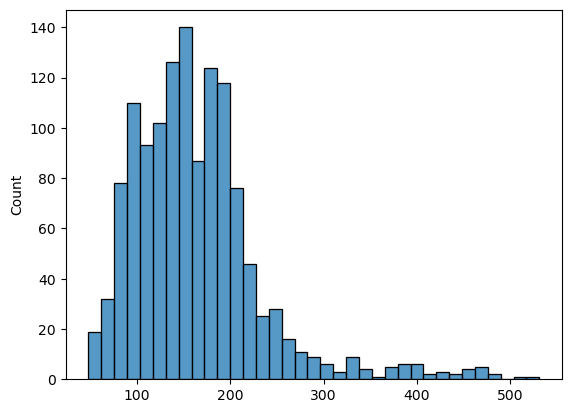

In [19]:
# Create a histogram plot of the predicted values
sns.histplot(y_predicted_test)

In [20]:
# Create a Pandas DataFrame with the predicted inventory units for the test dataset
submission = pd.DataFrame({
    'id' : test_df_just_for_id.id,
    'inventory_units' : y_predicted_test
})
submission

,id,inventory_units
0,202319-105609,78.248344
1,202319-107583,290.226380
2,202319-10857,155.607467
3,202319-109557,99.758329
4,202319-112518,170.330769
...,...,...
1295,202331-92778,108.993081
1296,202331-93765,123.062787
1297,202331-94752,171.009331
1298,202331-9870,138.614608


In [21]:
# Save the submission DataFrame as a CSV file
submission.to_csv('../submissions/submission4.csv', index = False)

# Save the model
pickle.dump(gsc1, open('../checkpoints/model_catboost.pkl', 'wb'))